In [4]:
import pandas as pd
import os

# 경로 설정
file_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201807_train_회원정보.parquet"

# 파일 불러오기
df = pd.read_parquet(file_path)

# 컬럼명 출력
print(df.columns.tolist())


['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분', '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '청구금액_기본연회비_B0M', '청

In [5]:
import pandas as pd
import os

# 1. 파일 경로 설정
base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보"
months = ['07', '08', '09', '10', '11', '12']
file_paths = [os.path.join(base_path, f"2018{month}_train_회원정보.parquet") for month in months]

# 2. 데이터 병합
df_list = []

for path in file_paths:
    기준년월 = os.path.basename(path).split('_')[0]
    df = pd.read_parquet(path)

    df['기준년월'] = 기준년월

    # 2-1. Segment, ID, 기준년월 포함
    # 2-2. 수치형 컬럼만 추출
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    cols_to_keep = ['ID', 'Segment', '기준년월'] + numeric_cols

    df_list.append(df[cols_to_keep])

# 3. 병합
all_df = pd.concat(df_list)

# 4. melt로 변수명을 세로로 바꿔줌
melted = all_df.melt(id_vars=['ID', 'Segment', '기준년월'],
                     var_name='변수명', value_name='값')

# 5. pivot으로 가로로 펼침
pivot_df = melted.pivot_table(index=['ID', 'Segment'],
                               columns=['변수명', '기준년월'],
                               values='값')

# 6. 열 이름 정리 (예: '이용금액_R3M_신용체크_201807' 형식)
pivot_df.columns = [f"{var}_{month}" for var, month in pivot_df.columns]

# 7. 인덱스 초기화
pivot_df.reset_index(inplace=True)

# ✅ 결과 확인
print(pivot_df.head())


             ID Segment  _1순위카드이용건수_201807  _1순위카드이용건수_201808  \
0  TRAIN_000000       D               26.0               23.0   
1  TRAIN_000001       E               46.0               48.0   
2  TRAIN_000002       C               28.0               51.0   
3  TRAIN_000003       D                1.0                3.0   
4  TRAIN_000004       E               -2.0               -2.0   

   _1순위카드이용건수_201809  _1순위카드이용건수_201810  _1순위카드이용건수_201811  _1순위카드이용건수_201812  \
0               27.0               26.0               26.0               25.0   
1               38.0               37.0               33.0               31.0   
2               55.0               46.0               43.0               52.0   
3               -2.0               19.0                9.0               27.0   
4               -1.0               -2.0               -2.0               -2.0   

   _1순위카드이용금액_201807  _1순위카드이용금액_201808  ...  회원여부_이용가능_CA_201809  \
0             3681.0             2529.0  ...         

In [6]:
from sklearn.preprocessing import LabelEncoder

# 0. 전체 문자형 컬럼 → 수치형(LabelEncoder)
df_encoded = pivot_df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# 1. Segment 라벨 인코딩 → 이미 숫자로 바뀌었으므로 생략 가능하지만 안전하게 따로 둠
df_encoded['Segment_encoded'] = LabelEncoder().fit_transform(pivot_df['Segment'])

# 2. 상관계수 계산 (이제 모든 컬럼이 수치형)
corr_df = df_encoded.corr()

# 3. Segment와의 상관계수 추출
segment_corr = corr_df['Segment_encoded'].drop('Segment_encoded')

# 4. 상관계수 정렬 (절댓값 기준 내림차순)
segment_corr = segment_corr.reindex(segment_corr.abs().sort_values(ascending=False).index)

# 5. 상관계수 0.3 이상만 필터링
strong_corr = segment_corr[segment_corr.abs() >= 0.3]

# ✅ 출력
print("📌 Segment와 상관계수 0.3 이상인 변수들:")
print(strong_corr)


📌 Segment와 상관계수 0.3 이상인 변수들:
Segment                 1.000000
이용금액_R3M_신용체크_201811   -0.629428
이용금액_R3M_신용체크_201812   -0.629148
이용금액_R3M_신용체크_201810   -0.628665
이용금액_R3M_신용체크_201809   -0.626218
                          ...   
소지카드수_이용가능_신용_201811   -0.323821
소지카드수_이용가능_신용_201810   -0.323271
소지카드수_이용가능_신용_201809   -0.322722
소지카드수_이용가능_신용_201808   -0.322105
소지카드수_이용가능_신용_201807   -0.321831
Name: Segment_encoded, Length: 85, dtype: float64


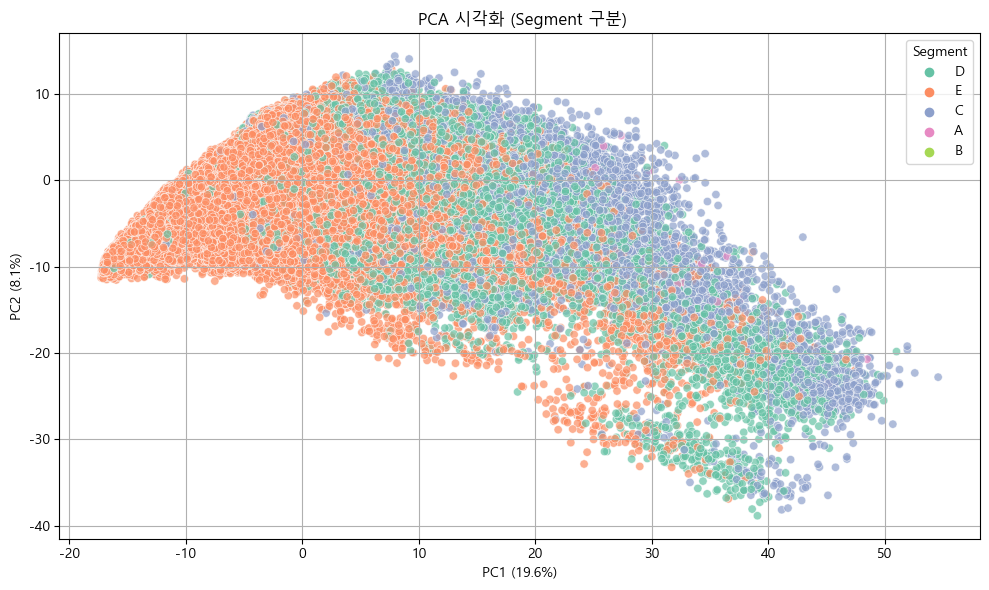

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 한글 깨짐 방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 1. 복사
df_pca = pivot_df.copy()

# 2. Segment 인코딩
df_pca['Segment_encoded'] = LabelEncoder().fit_transform(df_pca['Segment'])

# 3. 숫자형만 추출 (Segment 제외)
X = df_pca.select_dtypes(include='number').drop(columns=['Segment_encoded'])

# 4. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. 결측값 대체 (평균)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# 6. PCA 수행
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_imputed)

# 7. 결과 DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Segment'] = df_pca['Segment'].values  # 라벨 그대로 사용

# 8. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='Set2', alpha=0.7)
plt.title(" PCA 시각화 (Segment 구분)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# 각 주성분의 설명 분산 비율
print("PCA 설명 분산 비율 (explained_variance_ratio_):")
print(pca.explained_variance_ratio_)

# 누적 설명력도 함께 출력
print("누적 설명력 (cumulative):")
print(pca.explained_variance_ratio_.cumsum())


PCA 설명 분산 비율 (explained_variance_ratio_):
[0.19260713 0.09506198]
누적 설명력 (cumulative):
[0.19260713 0.28766912]


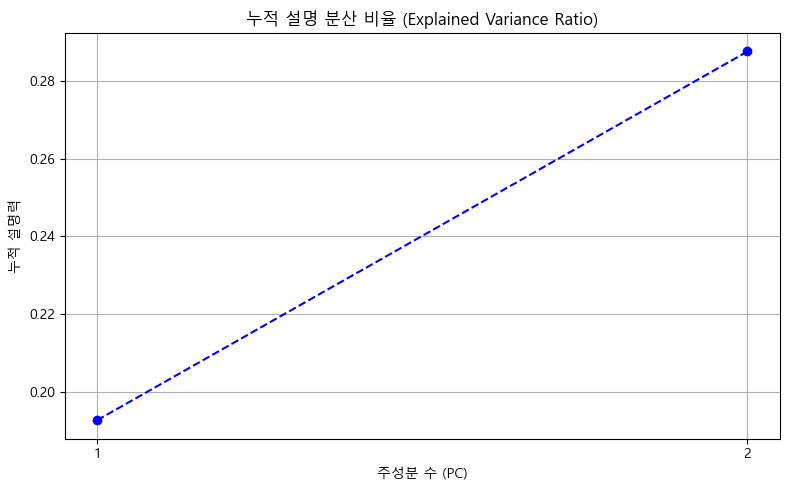

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 설명력 비율
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), cumulative, marker='o', linestyle='--', color='b')
plt.title('누적 설명 분산 비율 (Explained Variance Ratio)')
plt.xlabel('주성분 수 (PC)')
plt.ylabel('누적 설명력')
plt.xticks(range(1, len(explained)+1))
plt.grid(True)
plt.tight_layout()
plt.show()


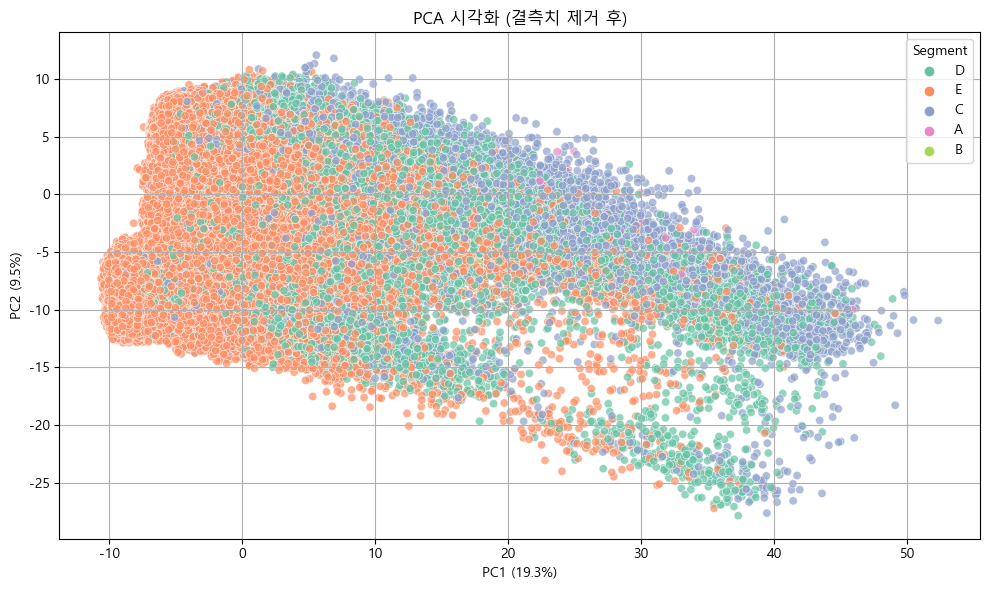

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 1. 복사
df_pca = pivot_df.copy()

# 2. Segment 인코딩
df_pca['Segment_encoded'] = LabelEncoder().fit_transform(df_pca['Segment'])

# 3. 숫자형만 추출 (Segment 제외)
X = df_pca.select_dtypes(include='number').drop(columns=['Segment_encoded'])

# ✅ 4. 결측치 제거
X_clean = X.dropna()
segment_clean = df_pca.loc[X_clean.index, 'Segment']

# 5. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# 6. PCA 수행
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# 7. 결과 DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Segment'] = segment_clean.values  # 제거된 인덱스에 맞게 라벨도 맞춰줌

# 8. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='Set2', alpha=0.7)
plt.title("PCA 시각화 (결측치 제거 후)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


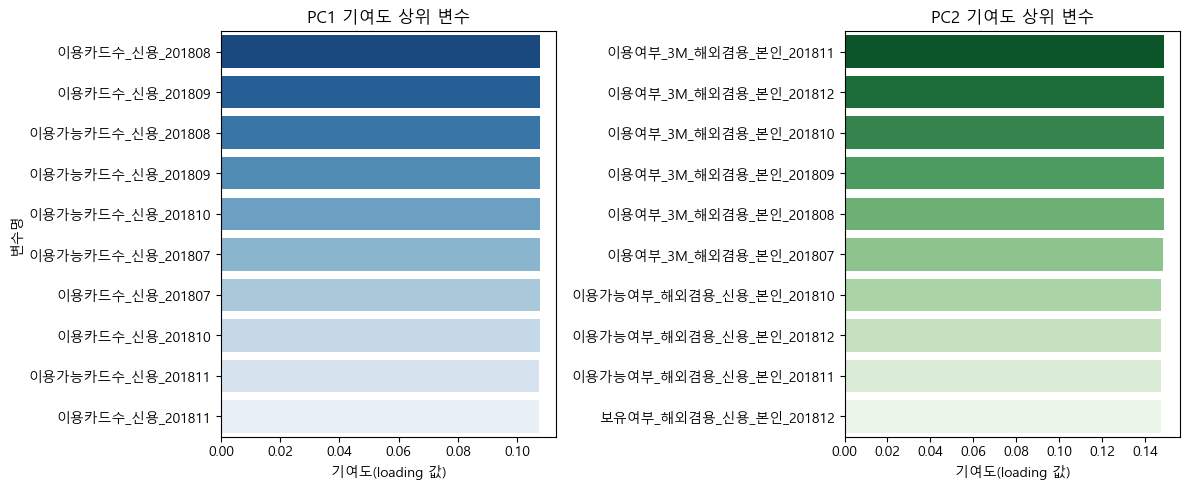

In [15]:
import numpy as np

# 변수 이름 (X_clean은 dropna로 결측 제거한 Feature DataFrame이었음)
feature_names = X_clean.columns

# 1. components_: shape (n_components, n_features)
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# 2. 기여도 절댓값 기준 정렬해서 상위 10개 변수 추출
top_n = 10

# PC1 기준
pc1_top_idx = np.argsort(np.abs(pc1_loadings))[::-1][:top_n]
pc1_top_features = feature_names[pc1_top_idx]
pc1_top_values = pc1_loadings[pc1_top_idx]

# PC2 기준
pc2_top_idx = np.argsort(np.abs(pc2_loadings))[::-1][:top_n]
pc2_top_features = feature_names[pc2_top_idx]
pc2_top_values = pc2_loadings[pc2_top_idx]

# 3. 시각화
plt.figure(figsize=(12, 5))

# PC1
plt.subplot(1, 2, 1)
sns.barplot(x=pc1_top_values, y=pc1_top_features, palette="Blues_r")
plt.title("PC1 기여도 상위 변수")
plt.xlabel("기여도(loading 값)")
plt.ylabel("변수명")

# PC2
plt.subplot(1, 2, 2)
sns.barplot(x=pc2_top_values, y=pc2_top_features, palette="Greens_r")
plt.title("PC2 기여도 상위 변수")
plt.xlabel("기여도(loading 값)")
plt.ylabel("")

plt.tight_layout()
plt.show()


In [16]:
# 각 주성분의 설명 분산 비율
print("PCA 설명 분산 비율 (explained_variance_ratio_):")
print(pca.explained_variance_ratio_)

# 누적 설명력도 함께 출력
print("누적 설명력 (cumulative):")
print(pca.explained_variance_ratio_.cumsum())


PCA 설명 분산 비율 (explained_variance_ratio_):
[0.19260713 0.09506198]
누적 설명력 (cumulative):
[0.19260713 0.28766912]


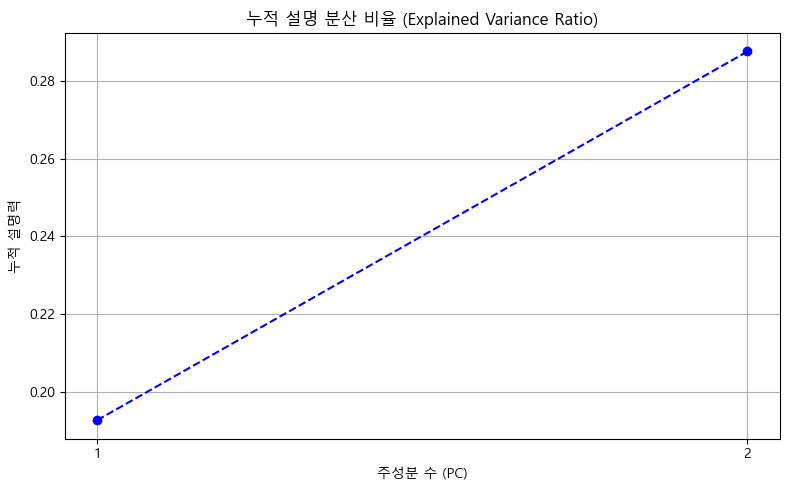

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 설명력 비율
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), cumulative, marker='o', linestyle='--', color='b')
plt.title('누적 설명 분산 비율 (Explained Variance Ratio)')
plt.xlabel('주성분 수 (PC)')
plt.ylabel('누적 설명력')
plt.xticks(range(1, len(explained)+1))
plt.grid(True)
plt.tight_layout()
plt.show()
